Dati caricati: 197838 righe
Visualizzazione Pilota: VER - Giro: 41


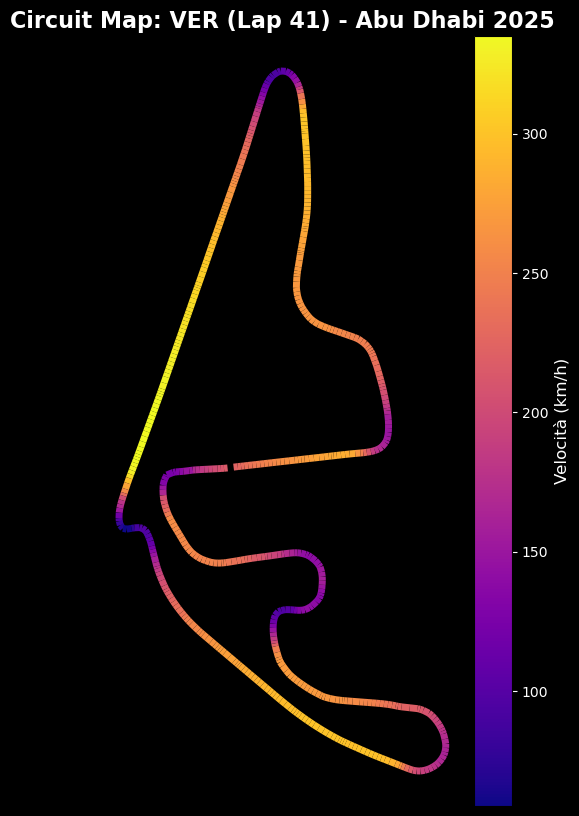

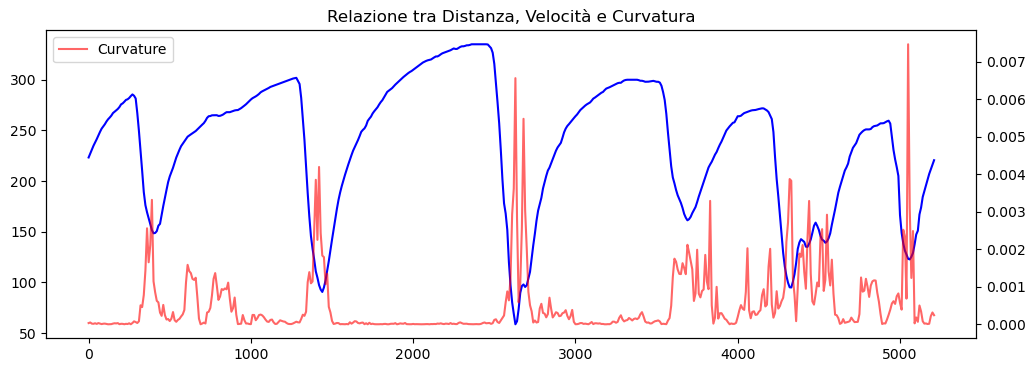

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

# 1. CARICAMENTO DATI
FILENAME = "dataset_Abu Dhabi_2025.csv"
try:
    df = pd.read_csv(FILENAME)
    print(f"Dati caricati: {len(df)} righe")
except FileNotFoundError:
    print(f"Errore: Il file {FILENAME} non è stato trovato. Esegui prima lo script di estrazione.")

# 2. SELEZIONE DI UN LAP SPECIFICO PER LA VISUALIZZAZIONE
# Visualizzare tutti i giri insieme creerebbe confusione. Scegliamo un pilota e il suo giro più veloce nel dataset.
driver_to_plot = 'VER'
driver_df = df[df['Driver'] == driver_to_plot]

# Troviamo il giro con la velocità media più alta (approssimazione del giro più veloce)
fastest_lap_num = driver_df.groupby('LapNumber')['Speed'].mean().idxmax()
lap_data = driver_df[driver_df['LapNumber'] == fastest_lap_num].sort_values(by='Space_Distance')

print(f"Visualizzazione Pilota: {driver_to_plot} - Giro: {fastest_lap_num}")

# 3. PREPARAZIONE DEI SEGMENTI PER IL PLOT
# Per colorare la linea in base alla velocità, dobbiamo spezzarla in segmenti
x = lap_data['X_Coord'].values
y = lap_data['Y_Coord'].values
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Scegli la variabile da visualizzare (Speed, Curvature, o DRS)
variable = lap_data['Speed'].values

# 4. CREAZIONE DEL PLOT
fig, ax = plt.subplots(figsize=(15, 10), facecolor='black')

# Definizione del colormap (Magma, Viridis, Plasma sono ottimi per la telemetria)
cmap = plt.get_cmap('plasma')
norm = plt.Normalize(variable.min(), variable.max())
lc = LineCollection(segments, cmap=cmap, norm=norm, linewidth=5)

# Applichiamo i dati alla linea
lc.set_array(variable)
line = ax.add_collection(lc)

# 5. ABBELLIMENTO ESTETICO
# Aggiunta Colorbar
cbar = fig.colorbar(line, ax=ax, pad=0.01)
cbar.set_label('Velocità (km/h)', color='white', fontsize=12)
cbar.ax.yaxis.set_tick_params(colors='white')

# Rimuoviamo gli assi per un look pulito da "mappa del circuito"
ax.axis('off')

# Manteniamo le proporzioni degli assi uguali (fondamentale per non distorcere il circuito)
ax.set_aspect('equal')
ax.set_autoscale_on(True)
ax.apply_aspect()

plt.title(f"Circuit Map: {driver_to_plot} (Lap {fastest_lap_num}) - Abu Dhabi 2025", 
          color='white', fontsize=16, fontweight='bold')

# Opzionale: Aggiungere punti per identificare le zone DRS
drs_zones = lap_data[lap_data['DRS'] == 1]
ax.scatter(drs_zones['X_Coord'], drs_zones['Y_Coord'], color='green', s=2, alpha=0.3, label='DRS Active')

plt.show()

# 6. ANALISI EXTRA: CURVATURA VS VELOCITÀ
plt.figure(figsize=(12, 4))
plt.plot(lap_data['Space_Distance'], lap_data['Speed'], label='Speed', color='blue')
plt.twinx()
plt.plot(lap_data['Space_Distance'], lap_data['Curvature'], label='Curvature', color='red', alpha=0.6)
plt.title("Relazione tra Distanza, Velocità e Curvatura")
plt.xlabel("Distanza (m)")
plt.legend()
plt.show()

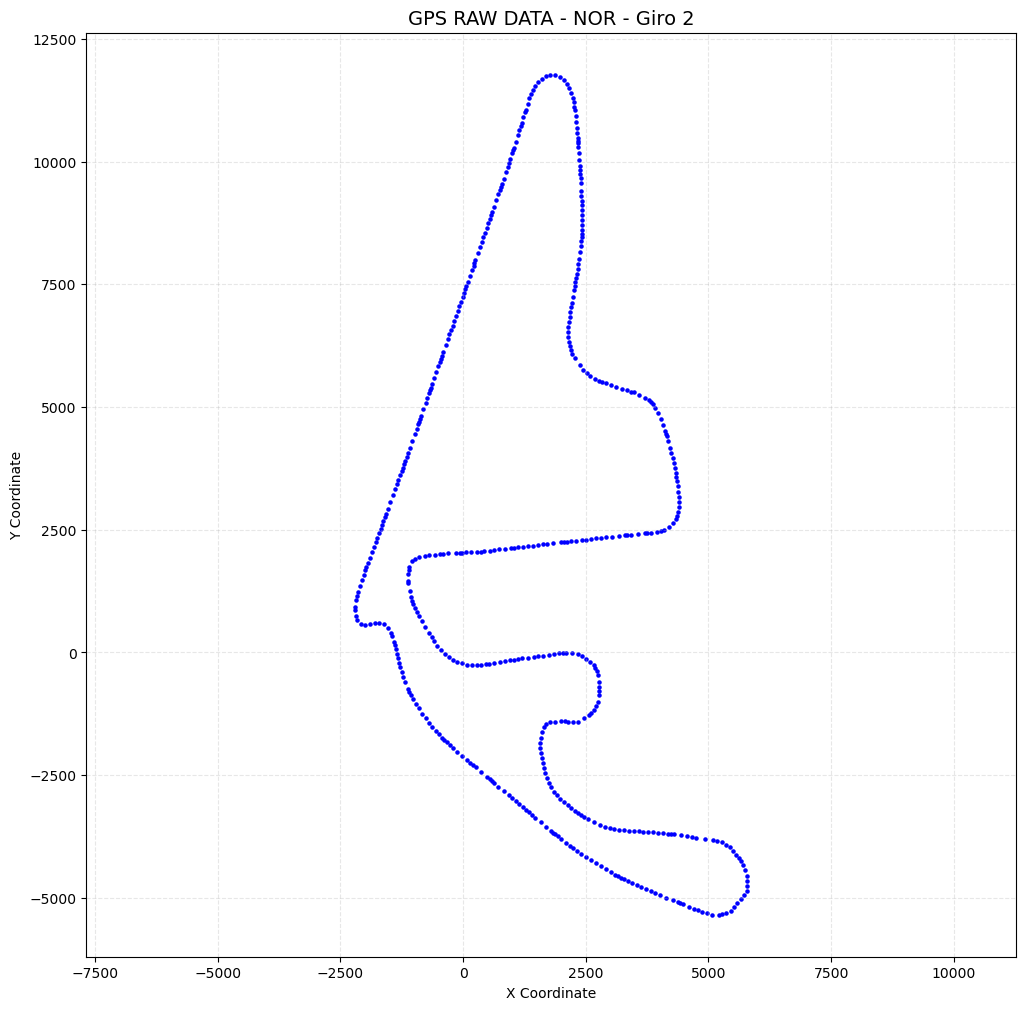

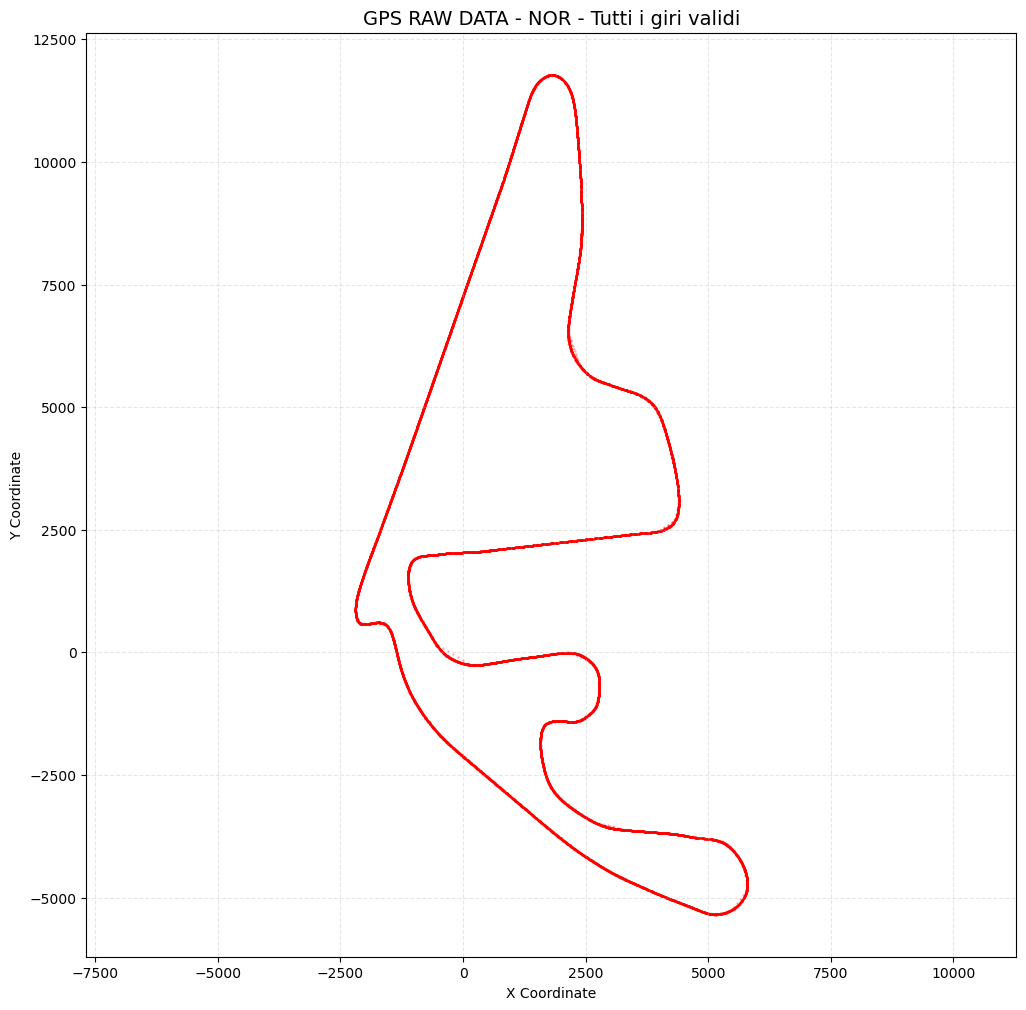

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. CARICAMENTO DATI
FILENAME = "dataset_Abu Dhabi_2025.csv"
df = pd.read_csv(FILENAME)

# Configurazione pilota
DRIVER_ID = 'NOR'  # Cambia con il pilota che preferisci
driver_df = df[df['Driver'] == DRIVER_ID]

# --- FOTO 1: GPS DI UN SOLO GIRO ---
# Prendiamo il primo giro disponibile nel dataset (o uno a scelta)
single_lap_num = driver_df['LapNumber'].min() 
one_lap_df = driver_df[driver_df['LapNumber'] == single_lap_num]

plt.figure(figsize=(12, 12))
plt.scatter(one_lap_df['X_Coord'], one_lap_df['Y_Coord'], 
            color='blue', 
            s=5,           # Dimensione del puntino
            marker='o')    # Forma a cerchio

plt.title(f"GPS RAW DATA - {DRIVER_ID} - Giro {single_lap_num}", fontsize=14)
plt.axis('equal')          # Mantiene le proporzioni reali del circuito
plt.grid(True, linestyle='--', alpha=0.3)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()


# --- FOTO 2: GPS DI TUTTI I GIRI ---
plt.figure(figsize=(12, 12))

# Usiamo un alpha basso (trasparenza) e un punto molto piccolo 
# per vedere dove i dati si sovrappongono
plt.scatter(driver_df['X_Coord'], driver_df['Y_Coord'], 
            color='red', 
            s=1,           # Puntini molto piccoli per non coprire tutto
            alpha=0.4,     # Trasparenza per vedere la densità
            marker='.')

plt.title(f"GPS RAW DATA - {DRIVER_ID} - Tutti i giri validi", fontsize=14)
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

# Nota: dato che il tuo script originale filtra già LapNumber > 1 
# e toglie i Pit Stop, qui vedrai solo la "nuvola" della traiettoria racing.
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_4316\2582220829.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([f'{DRIVER_2} +{v_max}', '', 'Pari', '', f'{DRIVER_1} +{v_max}'])


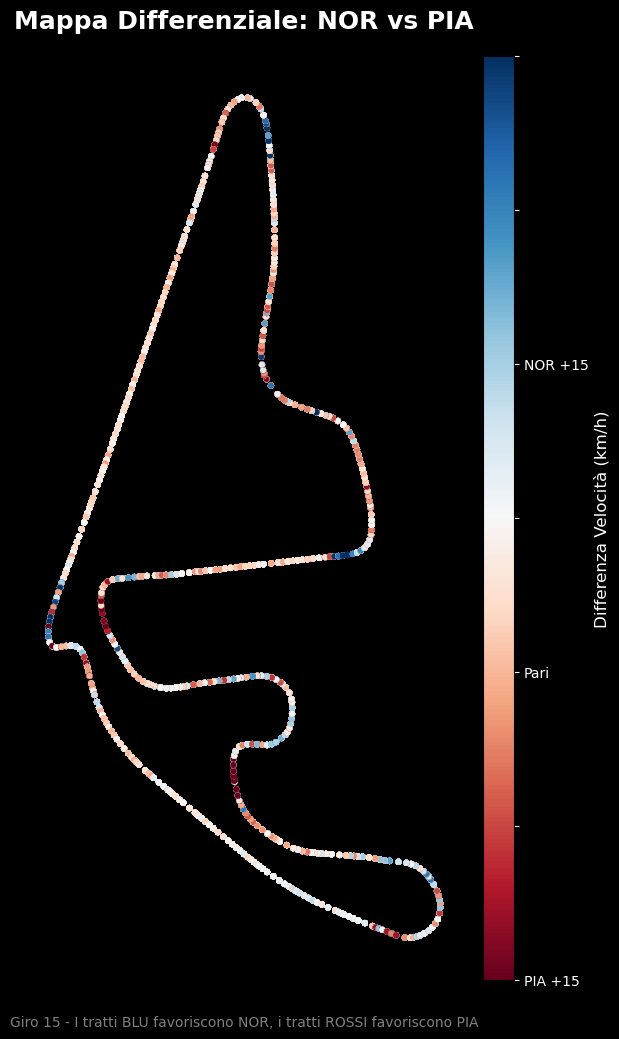

Analisi completata per il giro 15:
- Maggior vantaggio per NOR: +67.8 km/h
- Maggior vantaggio per PIA: +72.2 km/h


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. CARICAMENTO DATI
FILENAME = "dataset_Abu Dhabi_2025.csv"
df = pd.read_csv(FILENAME)

# 2. CONFIGURAZIONE PILOTI E GIRO
DRIVER_1 = 'NOR'  # Pilota Blu (Positivo nel Delta)
DRIVER_2 = 'PIA'  # Pilota Rosso (Negativo nel Delta)
LAP_NUM = 15      # Scegli un giro comune ad entrambi

# 3. FILTRAGGIO E SINCRONIZZAZIONE
# Filtriamo per pilota e giro, assicurandoci che siano ordinati per distanza
d1_data = df[(df['Driver'] == DRIVER_1) & (df['LapNumber'] == LAP_NUM)].sort_values('Space_Distance')
d2_data = df[(df['Driver'] == DRIVER_2) & (df['Driver'] == DRIVER_2)].sort_values('Space_Distance')

# Uniamo i dati sulla colonna 'Space_Distance' per essere sicuri di confrontare gli stessi punti
# (Il tuo script originale usa una griglia spaziale fissa, quindi i punti dovrebbero coincidere)
merged = pd.merge(d1_data, d2_data, on='Space_Distance', suffixes=('_D1', '_D2'))

# 4. CALCOLO DEL DELTA VELOCITÀ
# Delta = Speed_D1 - Speed_D2
merged['Delta_Speed'] = merged['Speed_D1'] - merged['Speed_D2']

# 5. VISUALIZZAZIONE
plt.figure(figsize=(15, 12), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

# Creiamo la mappa differenziale
# 'RdBu' è perfetto: Rosso (negativo), Bianco (zero), Blu (positivo)
v_max = 15 # Massimo scarto di velocità che vogliamo evidenziare (es. +/- 15 km/h)
sc = ax.scatter(
    merged['X_Coord_D1'], 
    merged['Y_Coord_D1'], 
    c=merged['Delta_Speed'], 
    cmap='RdBu', 
    s=20, 
    vmin=-v_max, 
    vmax=v_max,
    edgecolors='none'
)

# Aggiunta colorbar con etichette chiare
cbar = plt.colorbar(sc, pad=0.02, aspect=30)
cbar.set_label(f'Differenza Velocità (km/h)', color='white', fontsize=12)
cbar.ax.yaxis.set_tick_params(colors='white')
cbar.ax.set_yticklabels([f'{DRIVER_2} +{v_max}', '', 'Pari', '', f'{DRIVER_1} +{v_max}'])

# Estetica e titoli
plt.title(f"Mappa Differenziale: {DRIVER_1} vs {DRIVER_2}", color='white', fontsize=18, fontweight='bold', pad=20)
plt.text(0.5, -0.05, f"Giro {LAP_NUM} - I tratti BLU favoriscono {DRIVER_1}, i tratti ROSSI favoriscono {DRIVER_2}", 
         color='gray', ha='center', transform=ax.transAxes, fontsize=10)

ax.set_aspect('equal')
ax.axis('off')

plt.show()

# 6. ANALISI NUMERICA VELOCE
max_gain_d1 = merged['Delta_Speed'].max()
max_gain_d2 = abs(merged['Delta_Speed'].min())
print(f"Analisi completata per il giro {LAP_NUM}:")
print(f"- Maggior vantaggio per {DRIVER_1}: +{max_gain_d1:.1f} km/h")
print(f"- Maggior vantaggio per {DRIVER_2}: +{max_gain_d2:.1f} km/h")

Calcolo delle medie di gara per NOR e PIA...


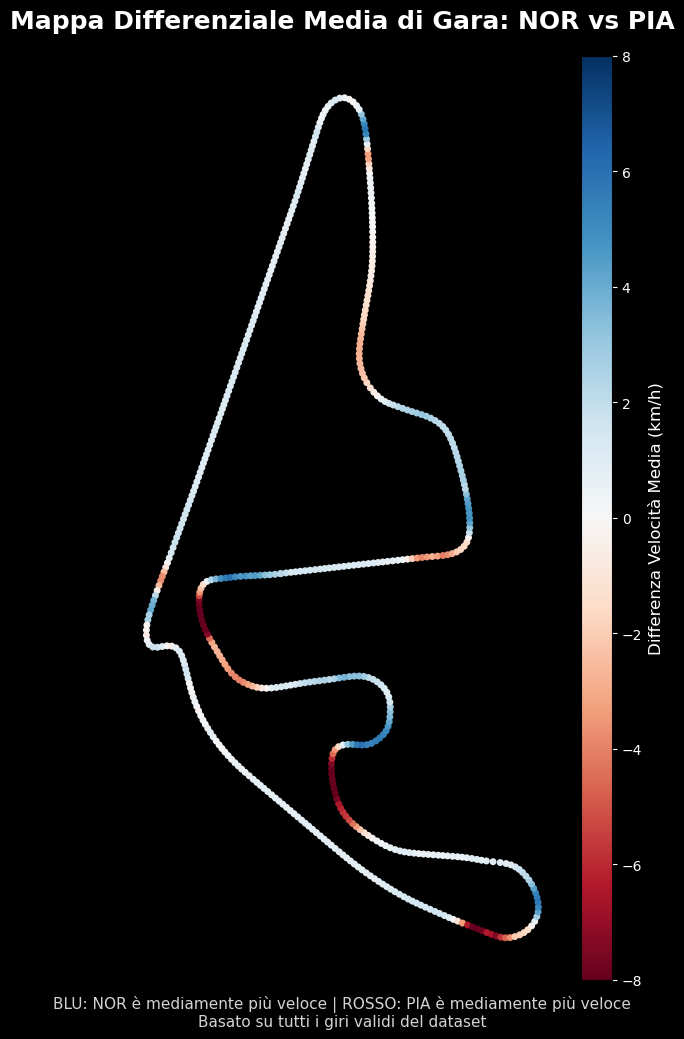

--- ANALISI DI GARA NOR vs PIA ---
NOR è più veloce nel 72.6% del tracciato.
PIA è più veloce nel 27.4% del tracciato.
Delta medio totale: 0.31 km/h


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. CARICAMENTO DATI
FILENAME = "dataset_Abu Dhabi_2025.csv"
df = pd.read_csv(FILENAME)

# 2. CONFIGURAZIONE PILOTI
DRIVER_1 = 'NOR'  # Più veloce se BLU
DRIVER_2 = 'PIA'  # Più veloce se ROSSO

# 3. AGGREGAZIONE MEDIE SPAZIALI
# Calcoliamo la media di Velocità, X e Y per ogni punto della griglia spaziale
print(f"Calcolo delle medie di gara per {DRIVER_1} e {DRIVER_2}...")

avg_d1 = df[df['Driver'] == DRIVER_1].groupby('Space_Distance').agg({
    'Speed': 'mean',
    'X_Coord': 'mean',
    'Y_Coord': 'mean'
}).reset_index()

avg_d2 = df[df['Driver'] == DRIVER_2].groupby('Space_Distance').agg({
    'Speed': 'mean',
    'X_Coord': 'mean',
    'Y_Coord': 'mean'
}).reset_index()

# 4. MERGE E CALCOLO DELTA
# Uniamo i due dataset sulla distanza spaziale
comparison = pd.merge(avg_d1, avg_d2, on='Space_Distance', suffixes=('_D1', '_D2'))

# Delta = (Media Speed D1) - (Media Speed D2)
comparison['Delta_Speed_Avg'] = comparison['Speed_D1'] - comparison['Speed_D2']

# 5. VISUALIZZAZIONE
plt.figure(figsize=(15, 12), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

# Usiamo una scala di colori divergente
# vmin/vmax a +/- 5 o 10 km/h solitamente bastano per le medie di gara
v_range = 8 

sc = ax.scatter(
    comparison['X_Coord_D1'], 
    comparison['Y_Coord_D1'], 
    c=comparison['Delta_Speed_Avg'], 
    cmap='RdBu', 
    s=25, 
    vmin=-v_range, 
    vmax=v_range,
    edgecolors='none'
)

# Colorbar
cbar = plt.colorbar(sc, pad=0.02, aspect=30)
cbar.set_label('Differenza Velocità Media (km/h)', color='white', fontsize=12)
cbar.ax.yaxis.set_tick_params(colors='white')

# Estetica
plt.title(f"Mappa Differenziale Media di Gara: {DRIVER_1} vs {DRIVER_2}", 
          color='white', fontsize=18, fontweight='bold', pad=20)

# Sottotitolo esplicativo
plt.text(0.5, -0.05, 
         f"BLU: {DRIVER_1} è mediamente più veloce | ROSSO: {DRIVER_2} è mediamente più veloce\nBasato su tutti i giri validi del dataset", 
         color='lightgray', ha='center', transform=ax.transAxes, fontsize=11)

ax.set_aspect('equal')
ax.axis('off')

plt.show()

# 6. STATISTICHE DI CONFRONTO
win_d1 = (comparison['Delta_Speed_Avg'] > 0).sum()
win_d2 = (comparison['Delta_Speed_Avg'] < 0).sum()
total_points = len(comparison)

print(f"--- ANALISI DI GARA {DRIVER_1} vs {DRIVER_2} ---")
print(f"{DRIVER_1} è più veloce nel {win_d1/total_points:.1%} del tracciato.")
print(f"{DRIVER_2} è più veloce nel {win_d2/total_points:.1%} del tracciato.")
print(f"Delta medio totale: {comparison['Delta_Speed_Avg'].mean():.2f} km/h")

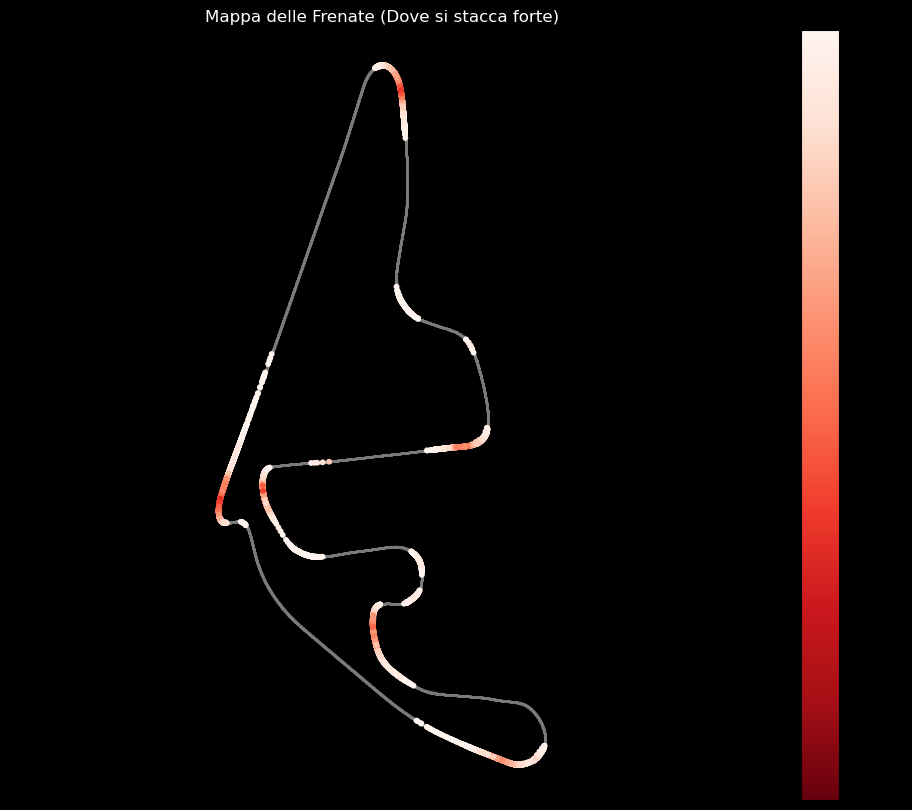

In [34]:
# Calcoliamo l'accelerazione longitudinale (G-force approssimata)
# Una decelerazione forte (valore negativo) indica una frenata
df['Acceleration'] = np.gradient(df['Speed'], df['Space_Distance'])

plt.figure(figsize=(12, 10), facecolor='black')
# Filtriamo solo le frenate forti
braking = df[(df['Driver'] == 'NOR') & (df['Acceleration'] < -0.05)]

plt.scatter(df[df['Driver'] == 'NOR']['X_Coord'], df[df['Driver'] == 'NOR']['Y_Coord'], color='grey', s=1, alpha=0.2)
plt.scatter(braking['X_Coord'], braking['Y_Coord'], c=braking['Acceleration'], cmap='Reds_r', s=10)

plt.title("Mappa delle Frenate (Dove si stacca forte)", color='white')
plt.axis('equal')
plt.axis('off')
plt.colorbar(label='Intensità Decelerazione')
plt.show()

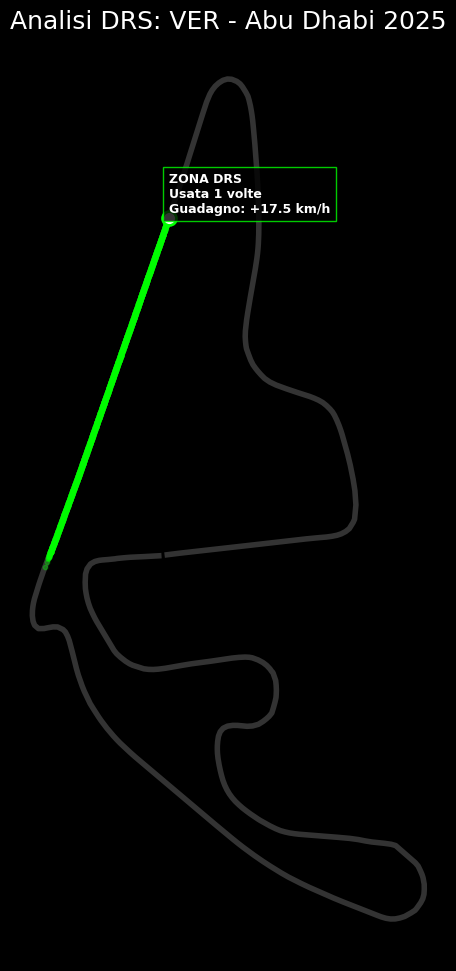

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. CARICAMENTO E FILTRO
DRIVER = 'VER'  # Cambia con il pilota desiderato
# Assicurati che 'df' sia il DataFrame caricato dal tuo nuovo CSV
df_driver = df[df['Driver'] == DRIVER].copy()

# 2. IDENTIFICAZIONE ATTIVAZIONI (Adattato al nuovo dataset 0/1)
# Ora cerchiamo direttamente dove DRS è uguale a 1
df_driver['DRS_Active'] = df_driver['DRS'].astype(int) 

# Individuiamo il momento esatto dell'attivazione (passaggio da 0 a 1)
df_driver['DRS_Activation'] = df_driver.groupby('LapNumber')['DRS_Active'].diff().fillna(0)

# Prendiamo tutti i metri (distanza) in cui il DRS è stato acceso almeno una volta in gara
drs_points = df_driver[df_driver['DRS_Active'] == 1]['Space_Distance'].unique()

if len(drs_points) == 0:
    print(f"Il pilota {DRIVER} non ha mai usato il DRS. Impossibile generare la mappa.")
else:
    drs_points_sorted = np.sort(drs_points)
    
    # Dividiamo i punti in zone (se due punti distano più di 300m, sono zone diverse)
    z_diff = np.where(np.diff(drs_points_sorted) > 300)[0]
    z_bounds = np.split(drs_points_sorted, z_diff + 1)

    results = []
    for zone in z_bounds:
        if len(zone) < 2: continue # Salta micro-zone di errore
        
        z_min, z_max = zone.min(), zone.max()
        
        # Calcolo velocità con DRS vs senza DRS nello stesso tratto
        data_zone = df_driver[(df_driver['Space_Distance'] >= z_min) & (df_driver['Space_Distance'] <= z_max)]
        
        speed_on = data_zone[data_zone['DRS_Active'] == 1]['Speed'].mean()
        speed_off = data_zone[data_zone['DRS_Active'] == 0]['Speed'].mean()
        
        # Procediamo solo se abbiamo una base di confronto (giri senza DRS)
        if pd.notna(speed_on) and pd.notna(speed_off):
            gain = speed_on - speed_off
            num_laps_with_drs = data_zone[data_zone['DRS_Activation'] == 1]['LapNumber'].nunique()
            
            # Recuperiamo le coordinate X, Y per il pallino di attivazione
            sample = data_zone[data_zone['DRS_Active'] == 1].iloc[0]
            
            results.append({
                'z_min': z_min, 'z_max': z_max,
                'gain': gain, 'count': num_laps_with_drs,
                'x': sample['X_Coord'], 'y': sample['Y_Coord']
            })

    # 3. PLOT
plt.figure(figsize=(15, 12), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

# --- CORREZIONE QUI: Disegniamo il circuito usando solo un giro come riferimento ---
# Prendiamo il primo giro disponibile per avere una linea continua e coerente
ref_lap_num = df_driver['LapNumber'].iloc[0]
circuit_ref = df_driver[df_driver['LapNumber'] == ref_lap_num].sort_values('Space_Distance')

plt.plot(circuit_ref['X_Coord'], circuit_ref['Y_Coord'], 
         color='#333333', linewidth=4, zorder=1, label='Circuito')

for res in results:
    # Evidenzia la zona DRS sul circuito
    # Filtriamo i dati globali per quella zona spaziale
    zone_data = df_driver[(df_driver['Space_Distance'] >= res['z_min']) & 
                          (df_driver['Space_Distance'] <= res['z_max'])]
    
    # Usiamo scatter per mostrare la nuvola di punti dove il DRS è attivo
    plt.scatter(zone_data['X_Coord'], zone_data['Y_Coord'], 
                c='lime', s=10, zorder=2, alpha=0.3)
    
    # Pallino di attivazione (punto esatto di inizio)
    plt.scatter(res['x'], res['y'], color='white', s=100, 
                edgecolors='lime', linewidth=2, zorder=3)
    
    # Testo informativo
    plt.text(res['x'], res['y'] + 100, 
             f"ZONA DRS\nUsata {res['count']} volte\nGuadagno: +{res['gain']:.1f} km/h", 
             color='white', fontsize=9, fontweight='bold',
             bbox=dict(facecolor='black', alpha=0.8, edgecolor='lime'))

plt.title(f"Analisi DRS: {DRIVER} - Abu Dhabi 2025", color='white', fontsize=18)
ax.set_aspect('equal')
ax.axis('off')
plt.show()

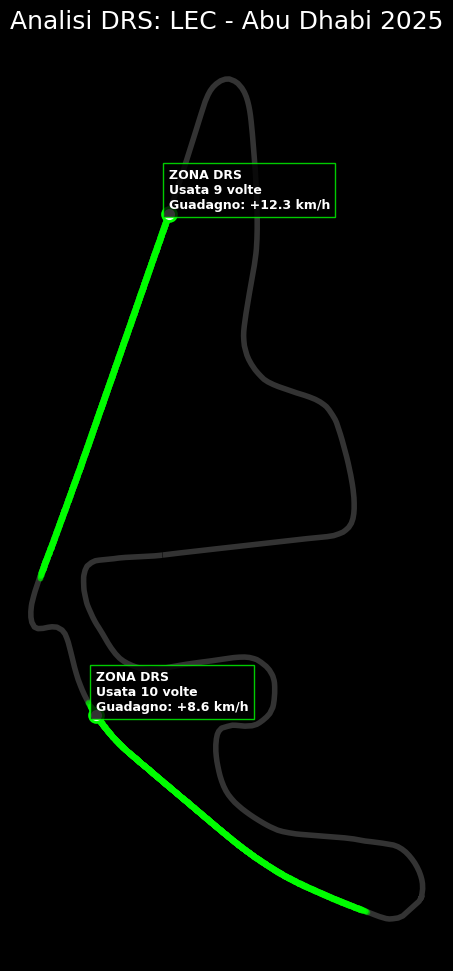

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. CARICAMENTO E FILTRO
DRIVER = 'LEC'  # Cambia con il pilota desiderato
# Assicurati che 'df' sia il DataFrame caricato dal tuo nuovo CSV
df_driver = df[df['Driver'] == DRIVER].copy()

# 2. IDENTIFICAZIONE ATTIVAZIONI (Adattato al nuovo dataset 0/1)
# Ora cerchiamo direttamente dove DRS è uguale a 1
df_driver['DRS_Active'] = df_driver['DRS'].astype(int) 

# Individuiamo il momento esatto dell'attivazione (passaggio da 0 a 1)
df_driver['DRS_Activation'] = df_driver.groupby('LapNumber')['DRS_Active'].diff().fillna(0)

# Prendiamo tutti i metri (distanza) in cui il DRS è stato acceso almeno una volta in gara
drs_points = df_driver[df_driver['DRS_Active'] == 1]['Space_Distance'].unique()

if len(drs_points) == 0:
    print(f"Il pilota {DRIVER} non ha mai usato il DRS. Impossibile generare la mappa.")
else:
    drs_points_sorted = np.sort(drs_points)
    
    # Dividiamo i punti in zone (se due punti distano più di 300m, sono zone diverse)
    z_diff = np.where(np.diff(drs_points_sorted) > 300)[0]
    z_bounds = np.split(drs_points_sorted, z_diff + 1)

    results = []
    for zone in z_bounds:
        if len(zone) < 2: continue # Salta micro-zone di errore
        
        z_min, z_max = zone.min(), zone.max()
        
        # Calcolo velocità con DRS vs senza DRS nello stesso tratto
        data_zone = df_driver[(df_driver['Space_Distance'] >= z_min) & (df_driver['Space_Distance'] <= z_max)]
        
        speed_on = data_zone[data_zone['DRS_Active'] == 1]['Speed'].mean()
        speed_off = data_zone[data_zone['DRS_Active'] == 0]['Speed'].mean()
        
        # Procediamo solo se abbiamo una base di confronto (giri senza DRS)
        if pd.notna(speed_on) and pd.notna(speed_off):
            gain = speed_on - speed_off
            num_laps_with_drs = data_zone[data_zone['DRS_Activation'] == 1]['LapNumber'].nunique()
            
            # Recuperiamo le coordinate X, Y per il pallino di attivazione
            sample = data_zone[data_zone['DRS_Active'] == 1].iloc[0]
            
            results.append({
                'z_min': z_min, 'z_max': z_max,
                'gain': gain, 'count': num_laps_with_drs,
                'x': sample['X_Coord'], 'y': sample['Y_Coord']
            })

    # 3. PLOT
plt.figure(figsize=(15, 12), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

# --- CORREZIONE QUI: Disegniamo il circuito usando solo un giro come riferimento ---
# Prendiamo il primo giro disponibile per avere una linea continua e coerente
ref_lap_num = df_driver['LapNumber'].iloc[0]
circuit_ref = df_driver[df_driver['LapNumber'] == ref_lap_num].sort_values('Space_Distance')

plt.plot(circuit_ref['X_Coord'], circuit_ref['Y_Coord'], 
         color='#333333', linewidth=4, zorder=1, label='Circuito')

for res in results:
    # Evidenzia la zona DRS sul circuito
    # Filtriamo i dati globali per quella zona spaziale
    zone_data = df_driver[(df_driver['Space_Distance'] >= res['z_min']) & 
                          (df_driver['Space_Distance'] <= res['z_max'])]
    
    # Usiamo scatter per mostrare la nuvola di punti dove il DRS è attivo
    plt.scatter(zone_data['X_Coord'], zone_data['Y_Coord'], 
                c='lime', s=10, zorder=2, alpha=0.3)
    
    # Pallino di attivazione (punto esatto di inizio)
    plt.scatter(res['x'], res['y'], color='white', s=100, 
                edgecolors='lime', linewidth=2, zorder=3)
    
    # Testo informativo
    plt.text(res['x'], res['y'] + 100, 
             f"ZONA DRS\nUsata {res['count']} volte\nGuadagno: +{res['gain']:.1f} km/h", 
             color='white', fontsize=9, fontweight='bold',
             bbox=dict(facecolor='black', alpha=0.8, edgecolor='lime'))

plt.title(f"Analisi DRS: {DRIVER} - Abu Dhabi 2025", color='white', fontsize=18)
ax.set_aspect('equal')
ax.axis('off')
plt.show()

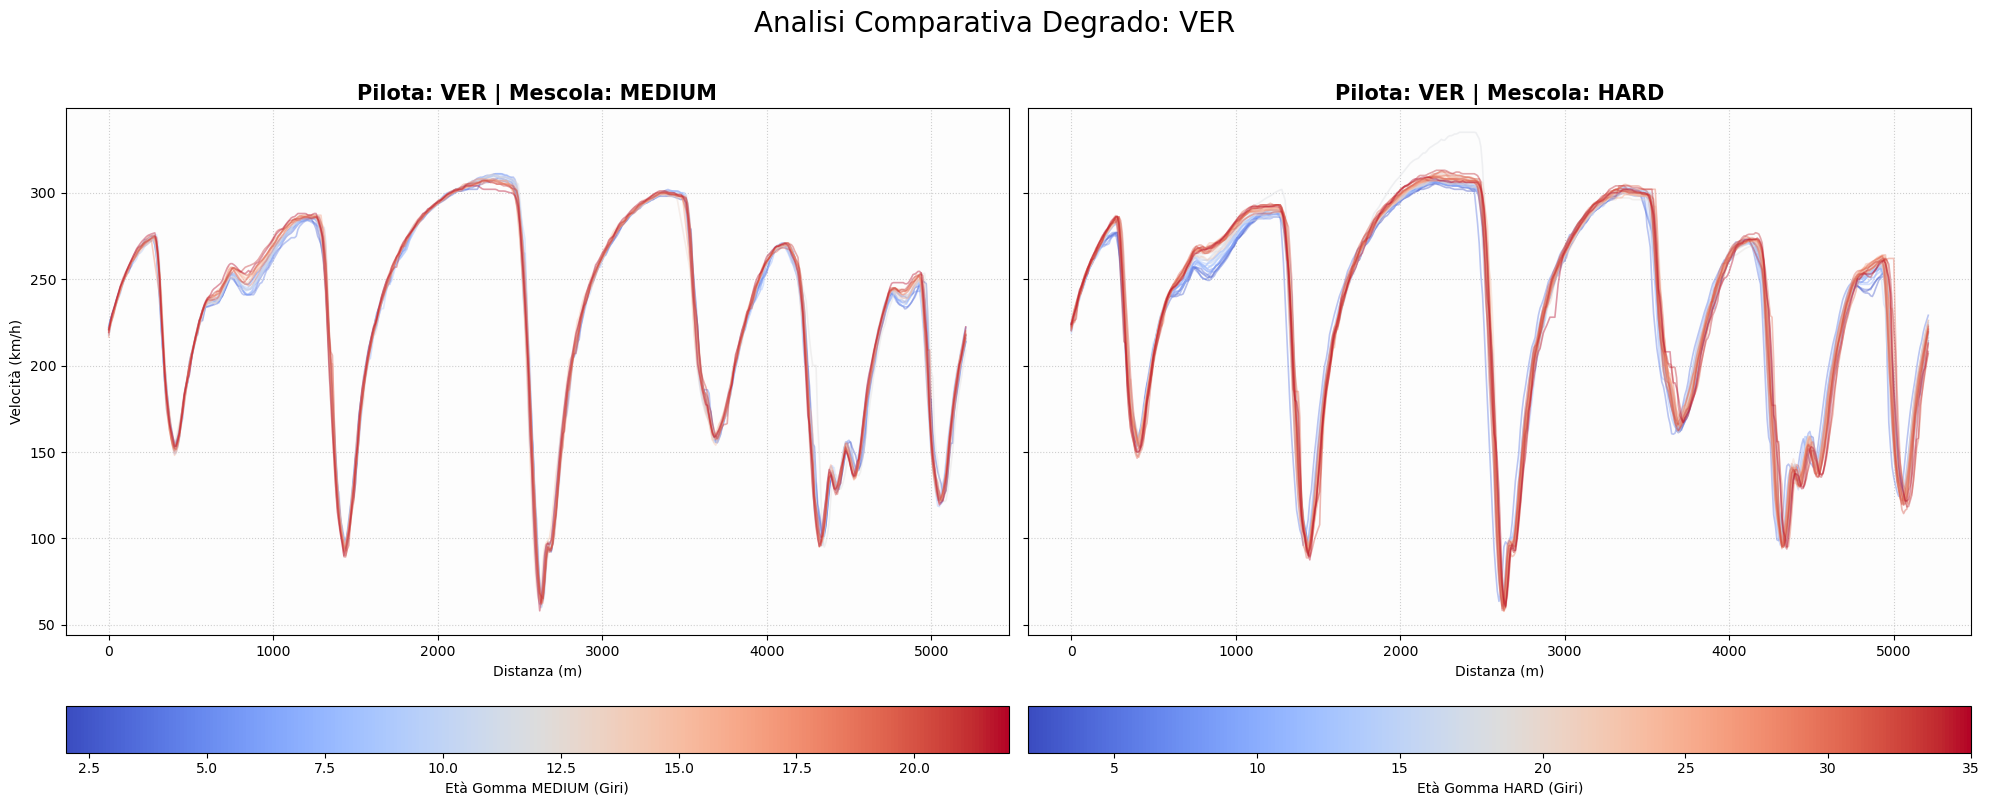

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 1. CONFIGURAZIONE
driver_to_analyze = 'VER'  
compounds_to_compare = ['MEDIUM', 'HARD']

# Creiamo la figura con due grafici affiancati (1 riga, 2 colonne)
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True, facecolor='white')

# 2. LOOP SULLE MESCOLE
for i, comp in enumerate(compounds_to_compare):
    ax = axes[i]
    
    # Filtro per pilota e mescola specifica
    df_sub = df[(df['Driver'] == driver_to_analyze) & (df['Compound'] == comp)].copy()
    
    if df_sub.empty:
        ax.text(0.5, 0.5, f"Nessun dato per {comp}", ha='center', va='center')
        ax.set_title(f"Mescola: {comp} (Dati mancanti)")
        continue

    # Palette colori: dal blu (nuova) al rosso (vecchia)
    norm = plt.Normalize(df_sub['TyreLife'].min(), df_sub['TyreLife'].max())
    cmap = plt.get_cmap('coolwarm')

    # Ciclo sui giri
    for life in sorted(df_sub['TyreLife'].unique()):
        lap_data = df_sub[df_sub['TyreLife'] == life].sort_values('Space_Distance')
        
        ax.plot(lap_data['Space_Distance'], lap_data['Speed'], 
                color=cmap(norm(life)), alpha=0.4, linewidth=1.2)

    # Creazione della barra dei colori specifica per questo grafico
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1)
    cbar.set_label(f'Età Gomma {comp} (Giri)')

    # Estetica del singolo grafico
    ax.set_title(f"Pilota: {driver_to_analyze} | Mescola: {comp}", fontsize=15, fontweight='bold')
    ax.set_xlabel("Distanza (m)")
    if i == 0: ax.set_ylabel("Velocità (km/h)")
    ax.set_facecolor('#fdfdfd')
    ax.grid(True, linestyle=':', alpha=0.6)

# Titolo generale della figura
plt.suptitle(f"Analisi Comparativa Degrado: {driver_to_analyze}", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

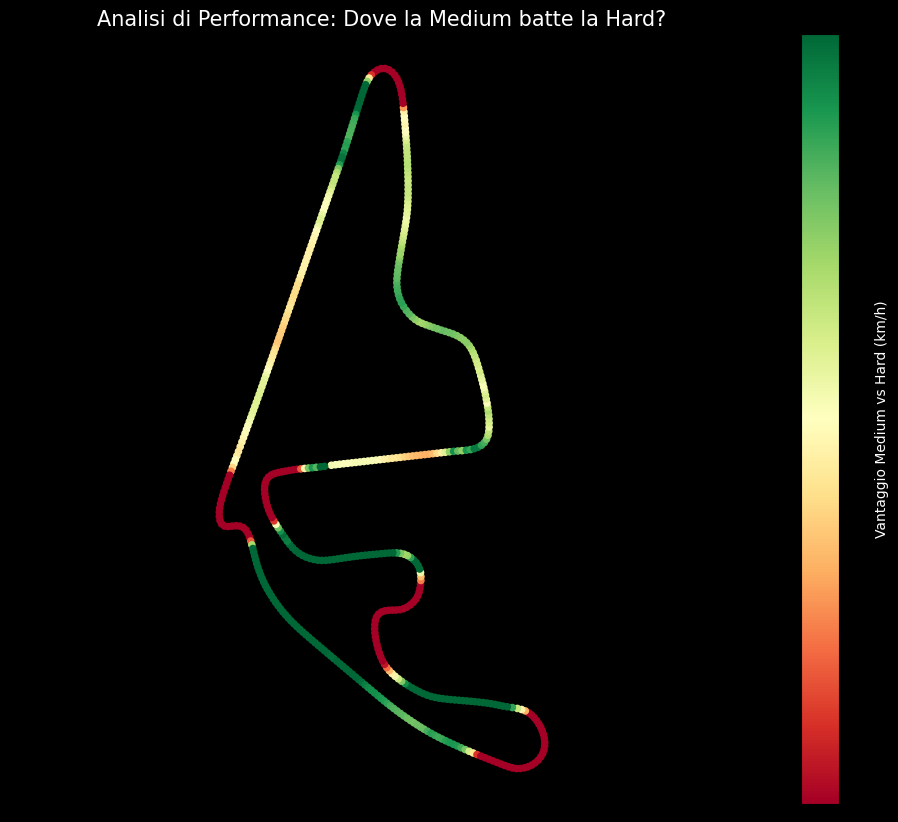

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calcoliamo la velocità media spaziale per le due mescole (usando solo gomme "giovani" < 10 giri per equità)
fresche_med = df[(df['Compound'] == 'MEDIUM') & (df['TyreLife'] < 10)].groupby('Space_Distance')['Speed'].mean()
fresche_hard = df[(df['Compound'] == 'HARD') & (df['TyreLife'] < 10)].groupby('Space_Distance')['Speed'].mean()

# Calcolo del Delta (Positivo = Medium più veloce)
delta_compounds = fresche_med - fresche_hard

# Recupero coordinate
coords = df.groupby('Space_Distance')[['X_Coord', 'Y_Coord']].mean()

plt.figure(figsize=(12, 10), facecolor='black')
sc = plt.scatter(coords['X_Coord'], coords['Y_Coord'], c=delta_compounds, cmap='RdYlGn', s=20, vmin=-3, vmax=3)
cbar = plt.colorbar(sc)
cbar.set_label('Vantaggio Medium vs Hard (km/h)', color='white')
plt.title("Analisi di Performance: Dove la Medium batte la Hard?", color='white', fontsize=15)
plt.axis('equal')
plt.axis('off')
plt.show()